# Overview

We are using this Delivery Hero Recommendation Dataset. 
https://github.com/deliveryhero/dh-reco-dataset

The data includes Foodpanda data from Singapore and Taiwan, and foodora data from Sweden.*

The goal is to analyse the data and use it to validate and support our proposed solutions.

*https://www.deliveryhero.com/wp-content/uploads/2024/03/2023-EXTERNAL-DH-GHG-Accounting-Methodology_FINAL_Branded.pdf



# Data Cleaning

Set `data_cleaning` to `True` to enable the data cleaning block

In [35]:
data_cleaning = False

## Converting geohash to lat/lon
The dataset included geohashes for each order. To visualise it using kepler.gl, converting this to latitude/longitude was required.

In [36]:
import pandas as pd

if data_cleaning:
	path = "orders_sg.csv"
	df = pd.read_csv(path)
	df.head()

In [37]:
import geohash
import os

def convert_geohash(file):
    df = pd.read_csv(file)
    try:
        df['geohash'].values.any()
    except KeyError:
        print("No geohash in file")
        return

    dir = os.getcwd()
    print(f"Processing {file}")
    name, ext = os.path.splitext(file)
    output_file = f'{dir}/{name}_clean.csv'  # Path to your output CSV file
    # Create empty lists to store the latitudes and longitudes
    latitudes = []
    longitudes = []

    # Iterate over each geohash in the DataFrame, decode it, and append the values
    for geohash_str in df['geohash']:
        lat, lon = geohash.decode(geohash_str)  # Decode the geohash
        latitudes.append(lat)
        longitudes.append(lon)

    # Add the latitude and longitude columns to the DataFrame
    df['latitude'] = latitudes
    df['longitude'] = longitudes

    # Save the updated DataFrame to a new CSV file
    df.to_csv(output_file, index=False)

In [38]:
def batch_convert_files():
	files = ["orders_sg_test.csv",
			"orders_sg_train.csv",
			"orders_sg.csv",
			"products_sg.csv",
			"vendors_sg.csv"]
	for file in files:
		convert_geohash(file)


In [39]:
if data_cleaning:
	batch_convert_files()

Testing data

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x=df['longitude'], y=df['latitude'])
plt.show()

NameError: name 'df' is not defined

# Importing Cleaned Data
The datasets are too big for github, so we are using google drive to store them for now.
Github Large File Storage (LFS) is something to look into if we have time.

In [17]:
def get_gd_csv(gd_id):
	url = f"https://drive.usercontent.google.com/download?id={gd_id}&export=download&authuser=0&confirm=t&uuid=7e92ecad-4c98-448f-8c21-cada2eefe64c&at=AO7h07fO3-BbnWsezAxoi78L-h_0%3A1727109215042"
	df = pd.read_csv(url)
	return df

In [18]:
'''
shareurl = f"https://drive.usercontent.google.com/download?id={gd_id}&export=download&authuser=0&confirm=t&uuid=7e92ecad-4c98-448f-8c21-cada2eefe64c&at=AO7h07fO3-BbnWsezAxoi78L-h_0%3A1727109215042"
df = pd.read_csv(shareurl)
df.head()
'''

'\nshareurl = f"https://drive.usercontent.google.com/download?id={gd_id}&export=download&authuser=0&confirm=t&uuid=7e92ecad-4c98-448f-8c21-cada2eefe64c&at=AO7h07fO3-BbnWsezAxoi78L-h_0%3A1727109215042"\ndf = pd.read_csv(shareurl)\ndf.head()\n'

In [19]:
# Load Data Using Google Drive URL
import pandas as pd

vendors_gd = '1FPYHV73PfNmC3p8AZEYeyoatJy9XUbAE'
orders_gd = '1ag0k8lzUWQ8J-CopiR4fjN_qv60ErLll'
products_gd = '13V5LUuQB8-VTZX45Eh_UynuQ0ZatAebf'

vendors = get_gd_csv(vendors_gd)
orders = get_gd_csv(orders_gd)
products = get_gd_csv(products_gd)

In [20]:
products.head()

,Unnamed: 0,vendor_id,product_id,name,unit_price
0,0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024
3,3,7112a20b,d3e7708c2bc9,Maguro Sushi,0.0012
4,4,6137ef21,bf0d5ac0e03c,Family Meal - Prosp Chic TwLEVMx2 + ChBurgerHM,0.0100


In [21]:
vendors.head()

,Unnamed: 0,vendor_id,chain_id,geohash,primary_cuisine,latitude,longitude
0,0,b160c319,d2786168,w21z6,mexican,1.296387,103.820801
1,1,9c8f010e,d2786168,w21ze,mexican,1.340332,103.864746
2,4,03eb25e1,5055ab25,w21ze,bak kut teh,1.340332,103.864746
3,5,3613129a,8984acb6,w23b1,italian,1.428223,103.776855
4,7,0946c9e5,1e3a2913,w21z4,bak kut teh,1.252441,103.820801


In [22]:
orders.head()

,Unnamed: 0,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day,latitude,longitude
0,5,f374c8c54c,w21zt,1,21830106,f245bdf79350,4,19:03:03,61 days,1.340332,103.952637
1,6,f374c8c54c,w21zt,1,21830106,146127be77d4,4,19:03:03,61 days,1.340332,103.952637
2,7,f374c8c54c,w21zt,1,21830106,6c108c0fb2b9,4,19:03:03,61 days,1.340332,103.952637
3,8,f374c8c54c,w21zt,1,21830106,da422c7836e1,4,19:03:03,61 days,1.340332,103.952637
4,9,f374c8c54c,w21zt,1,21830106,01110c80a0fa,4,19:03:03,61 days,1.340332,103.952637


In [23]:
orders.describe()

,Unnamed: 0,order_id,day_of_week,latitude,longitude
count,3.431870e+06,3.431870e+06,3.431870e+06,3.431870e+06,3.431870e+06
mean,2.010886e+06,9.942225e+05,3.222327e+00,1.350844e+00,1.038420e+02
std,1.162486e+06,5.813534e+05,2.016663e+00,4.634304e-02,6.882224e-02
min,5.000000e+00,1.000000e+00,0.000000e+00,1.252441e+00,1.036011e+02
25%,1.003444e+06,4.893450e+05,1.000000e+00,1.296387e+00,1.037769e+02
50%,2.010578e+06,9.860500e+05,3.000000e+00,1.340332e+00,1.038647e+02
75%,3.018525e+06,1.501452e+06,5.000000e+00,1.384277e+00,1.039087e+02
max,4.023004e+06,1.999999e+06,6.000000e+00,1.472168e+00,1.040405e+02


In [24]:
# Merge orders with vendors and products to get a complete view
merged_data = orders.merge(vendors, on="vendor_id").merge(products, on=["vendor_id", "product_id"])

# Apply the segmentation rule
def segment_delivery(row):
    if 'grocery' in row['name'].lower() or 'combo' in row['name'].lower() or row['primary_cuisine'] == 'grocery':
        return 'Grocery Delivery'
    else:
        return 'Food Delivery'

# Create a new column in the merged dataframe for the segmentation
merged_data['delivery_type'] = merged_data.apply(segment_delivery, axis=1)

# Output the segmented data
print(merged_data[['order_id', 'vendor_id', 'product_id', 'name', 'primary_cuisine', 'delivery_type']])


         order_id vendor_id    product_id                               name  \
0               1  21830106  f245bdf79350           Chicken Cutlet with Rice   
1               1  21830106  146127be77d4                       Chicken Chop   
2               1  21830106  6c108c0fb2b9            Chicken Wings with Rice   
3               1  21830106  da422c7836e1                Saba Fish with Rice   
4               1  21830106  01110c80a0fa             Chicken Chop with Rice   
...           ...       ...           ...                                ...   
3431824   1999998  ff0edd9f  7602ccd87eea              Laksa Prawn Spaghetti   
3431825   1999998  ff0edd9f  91129b65ae92  Smoked Duck Penne with Thai Sauce   
3431826   1999999  2bba6450  7bb67a5dd524                 Tom Yam Fried Rice   
3431827   1999999  2bba6450  d40fe2db522c                               Beef   
3431828   1999999  2bba6450  5925157ecb14      A27 Salted Egg Chicken Cutlet   

        primary_cuisine  delivery_type 

In [15]:
food_delivery = merged_data[merged_data['delivery_type'] == 'Food Delivery']
groceries_delivery = merged_data[merged_data['delivery_type'] == 'Grocery Delivery']

groceries_delivery.head()

,Unnamed: 0_x,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,latitude_x,...,Unnamed: 0_y,chain_id,geohash_y,primary_cuisine,latitude_y,longitude_y,Unnamed: 0,name,unit_price,delivery_type
77,90,60cd03df0e,w21ze,39,94027f7b,20492c73b999,3,12:20:15,46 days,1.340332,...,17164,e8661f66,w21ze,chicken rice,1.340332,103.864746,418300,Chicken Rice Combo Box A 白切鸡套餐A,0.0060,Grocery Delivery
78,91,60cd03df0e,w21ze,39,94027f7b,20492c73b999,3,12:20:15,46 days,1.340332,...,17164,e8661f66,w21ze,chicken rice,1.340332,103.864746,418300,Chicken Rice Combo Box A 白切鸡套餐A,0.0060,Grocery Delivery
285,317,ac756950a6,w21zt,131,cf29d429,66b3c55a8ade,4,18:44:07,26 days,1.340332,...,4613,a6edbf5c,w21zt,indian,1.340332,103.952637,746540,Indo Chinese Vegetable Combo,0.0176,Grocery Delivery
299,331,41c9dd8182,w21z6,137,8b9c4653,6da07fde0b75,3,13:14:30,11 days,1.296387,...,4575,NaN,w21z3,indian,1.296387,103.776855,205933,Nasi Goreng Combo,0.0040,Grocery Delivery
347,388,43f58c76cf,w21z7,162,7f8185c6,4785a4d5847f,4,23:59:54,75 days,1.296387,...,14353,0c1538fe,w21z7,malaysian,1.296387,103.864746,386657,Mee Goreng Combo,0.0036,Grocery Delivery


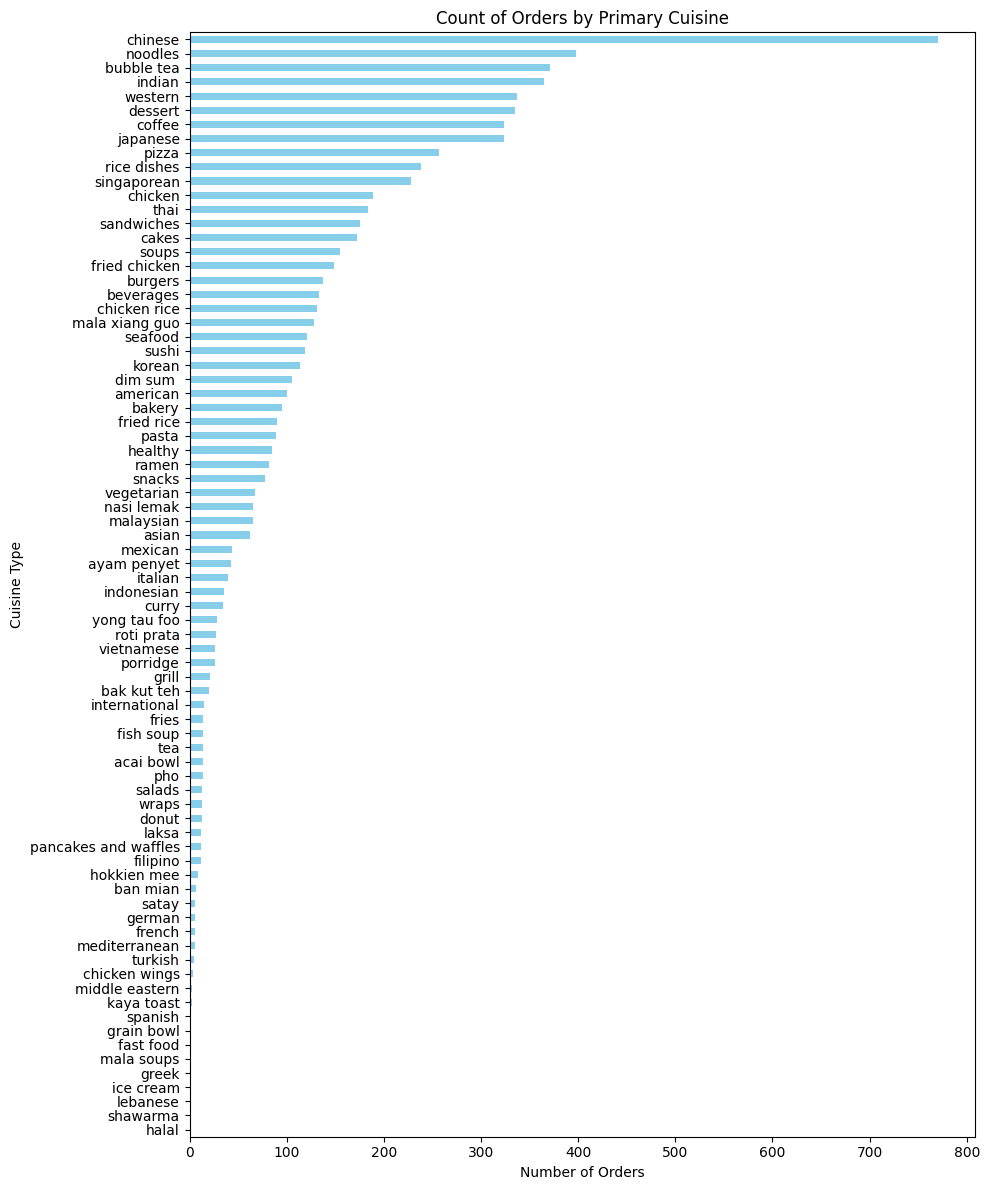

In [30]:
import matplotlib.pyplot as plt

# Get unique values and their counts from the 'primary_cuisine' column
cuisine_counts = vendors['primary_cuisine'].value_counts()
cuisine_counts_sorted= cuisine_counts.sort_values(ascending=True)

# Plot the unique values in a bar chart
plt.figure(figsize=(10, 12))
cuisine_counts_sorted.plot(kind='barh', color='skyblue')
plt.title('Count of Orders by Primary Cuisine')
plt.ylabel('Cuisine Type')
plt.xlabel('Number of Orders')
#plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

[TODO] Segment data into food delivery and grocery delivery segments
Use the product_id to identify vendors that are dealing with groceries and separate the data

Add vendor latlon to each order

In [31]:
# Drop duplicates to keep one entry per order_id in the orders table
orders_unique = orders.drop_duplicates(subset='order_id')

# Merge with vendors to append v_latitude and v_longitude using the vendor_id
merged_orders = orders_unique.merge(vendors, on='vendor_id', suffixes=('', '_vendor'))

# Rename the latitude and longitude columns for vendors
merged_orders = merged_orders.rename(columns={'latitude_vendor': 'v_latitude', 'longitude_vendor': 'v_longitude'})

# Select and display the relevant columns
orders_p2p = merged_orders[['order_id', 'vendor_id', 'day_of_week', 'order_time', 'order_day', 'latitude', 'longitude', 'v_latitude', 'v_longitude']]

orders_p2p.head()
#import ace_tools as tools; tools.display_dataframe_to_user(name="New Orders Table", dataframe=new_table)

,order_id,vendor_id,day_of_week,order_time,order_day,latitude,longitude,v_latitude,v_longitude
0,1,21830106,4,19:03:03,61 days,1.340332,103.952637,1.340332,103.952637
1,2,ee4f2ee0,0,18:08:42,8 days,1.296387,103.820801,1.296387,103.864746
2,3,b62d39b7,2,19:05:15,59 days,1.296387,103.820801,1.296387,103.776855
3,5,642370bd,0,19:14:49,29 days,1.296387,103.820801,1.296387,103.820801
4,7,23c3cbb7,6,18:15:10,70 days,1.296387,103.820801,1.296387,103.820801


# Visualising data with kepler.gl

In [32]:
map_1.add_data(data=orders_p2p, name="Orders")

In [34]:
map_1.height = 800
map_1

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'w9tyt2p', 'type': …

In [6]:
map_1.save_to_html(file_name='kepler_map.html')


Map saved to kepler_map.html!
